In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

t = np.arange(100)
trend = 0.5 * t
season = 10 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(0, 1, 100)

y = trend + noise
y_season = trend + season + noise
x = 5 * np.sin(2 * np.pi * t)

data = pd.DataFrame({'Time': t, 'Value': y, 'Value_Season': y_season, 'Exo_Var': x})
data

,Time,Value,Value_Season,Exo_Var
0,0,-0.505358,-0.505358,0.000000e+00
1,1,-0.315792,4.684208,-1.224647e-15
2,2,0.492482,9.152736,-2.449294e-15
3,3,0.448120,10.448120,-3.673940e-15
4,4,4.497200,13.157454,-4.898587e-15
...,...,...,...,...
95,95,47.826963,42.826963,-9.760036e-15
96,96,48.330035,48.330035,-1.175661e-13
97,97,50.725944,55.725944,-2.253721e-13
98,98,50.370989,59.031243,-3.331782e-13


<Axes: >

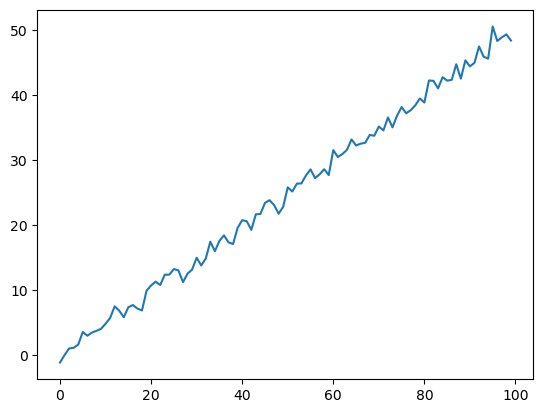

In [11]:
data['Value'].plot()

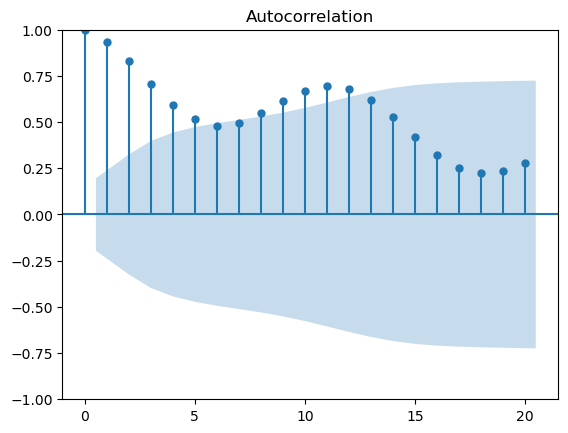

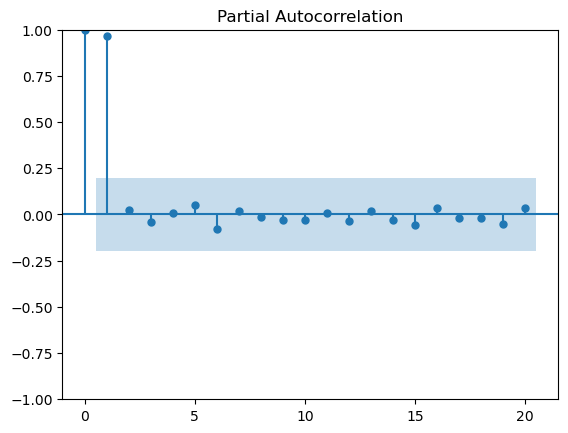

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(data['Value_Season'])

pacf_original = plot_pacf(data['Value'])

In [16]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Value'])
print(f'p-value: {adf_test[1]}')

p-value: 0.987099029476007


In [44]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Value'].diff().diff().dropna())
print(f'p-value: {adf_test[1]}')

p-value: 7.592187428159203e-07


<Axes: >

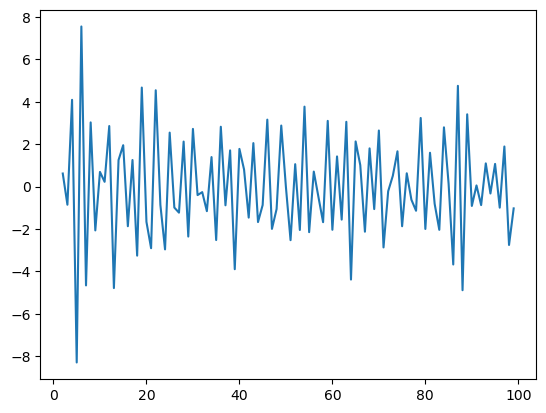

In [64]:
df_train_diff = data['Value'].diff().diff().dropna()
df_train_diff.plot()

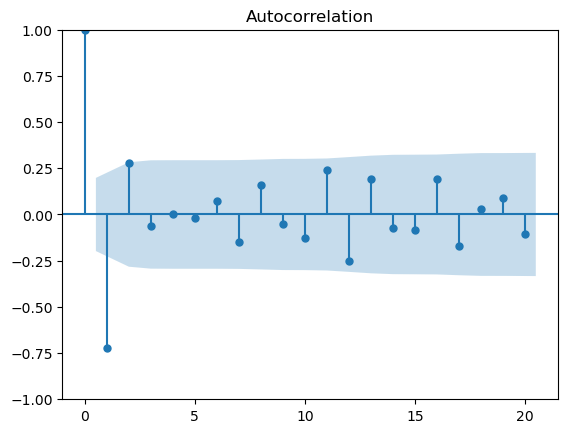

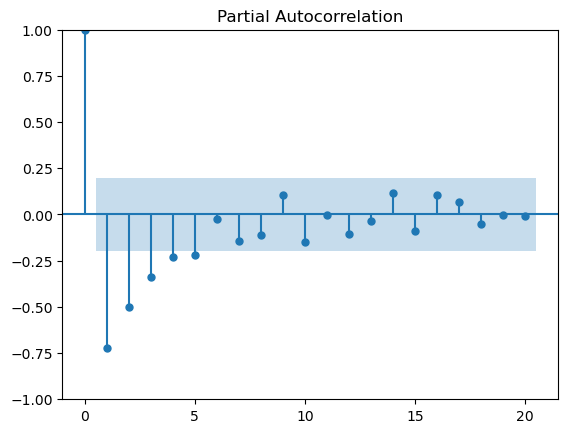

In [65]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [73]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Value'], order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -170.256
Date:                Sat, 02 Dec 2023   AIC                            346.511
Time:                        03:38:29   BIC                            354.296
Sample:                             0   HQIC                           349.661
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4703      0.106     -4.427      0.000      -0.678      -0.262
ma.L2          0.3057      0.115      2.654      0.008       0.080       0.531
sigma2         1.8189      0.265      6.858      0.0

In [67]:
import pmdarima as pm
auto_arima = pm.auto_arima(data['Value'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Value'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -164.243
Date:                Sat, 02 Dec 2023   AIC                            340.487
Time:                        03:36:01   BIC                            356.057
Sample:                             0   HQIC                           346.787
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5180      0.110     -4.693      0.000      -0.734      -0.302
ar.L2          0.0270      0.119      0.227      0.820      -0.206       0.260
ar.L3          0.3123      0.123      2.538      0.0

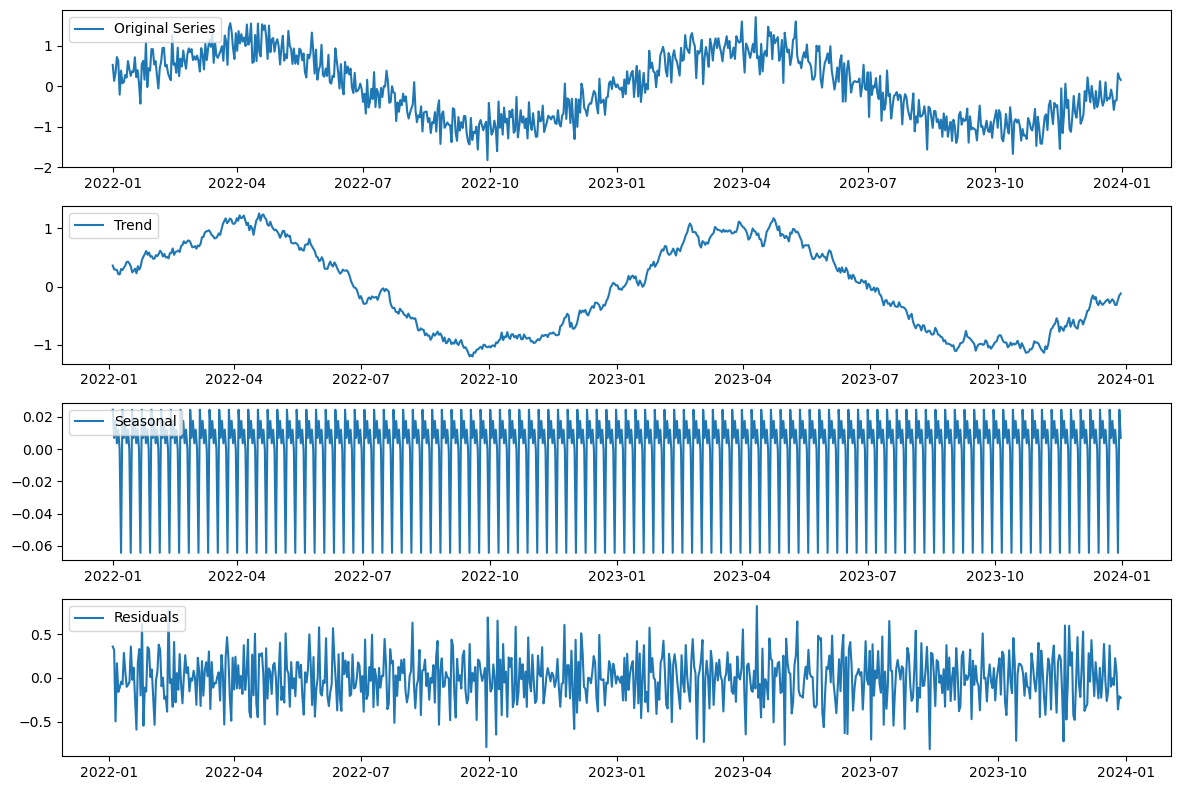

In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Creazione di dati sintetici
np.random.seed(0)
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
data = pd.DataFrame(date_rng, columns=['date'])
data['Value_Season'] = np.sin(np.arange(len(date_rng)) * 2 * np.pi / 365) + np.random.normal(scale=0.3, size=len(date_rng))

# Imposta l'indice temporale
data = data.set_index('date')

# Decomposizione della serie temporale
result = seasonal_decompose(data['Value_Season'], model='additive')

# Plot della decomposizione
plt.figure(figsize=(12, 8))

# Serie originale
plt.subplot(4, 1, 1)
plt.plot(data['Value_Season'], label='Original Series')
plt.legend(loc='upper left')

# Trend
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

# Stagionalità
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Residui
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [55]:
import pmdarima as pm
auto_arima = pm.auto_arima(data['Value_Season'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['Value_Season'], order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))
results = model.fit()

results.summary()

C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Value_Season   No. Observations:                  730
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -203.294
Date:                              Sat, 02 Dec 2023   AIC                            416.588
Time:                                      03:30:41   BIC                            439.463
Sample:                                  01-01-2022   HQIC                           425.421
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9882      0.009    107.209      0.000       0.970       1.006
ma.L1         -1.9136      0.015   -128.750      0.000      -1.943      -1.885
ma.L2          0.9208      0.015     63.438      0.000       0.892       0.949
ma.S.L12      -0.9584      0.019    -49.916      0.000      -0.996      -0.921
sigma2         0.0990      0.005     19.272      0.000       0.089       0.109
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.80   Prob(JB):                         0.54
Heteroskedasticity (H):               1.16   Skew:                            -0.09
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
model = SARIMAX(data['Value_Season'], order=(1, 1, 2))
results = model.fit()

results.summary()

C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\silve\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Value_Season   No. Observations:                  730
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -183.534
Date:                Sat, 02 Dec 2023   AIC                            375.068
Time:                        03:30:02   BIC                            393.435
Sample:                    01-01-2022   HQIC                           382.154
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9843      0.010    101.662      0.000       0.965       1.003
ma.L1         -1.9129      0.015   -129.977      0.000      -1.942      -1.884
ma.L2          0.9206      0.014     64.159      0.000       0.892       0.949
sigma2         0.0965      0.005     18.600      0.000       0.086       0.107
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.75   Prob(JB):                         0.75
Heteroskedasticity (H):               1.10   Skew:                            -0.05
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
import pandas as pd

df = pd.read_csv('BTC-USD.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3359,2023-11-28,37247.992188,38368.480469,36891.089844,37831.085938,37831.085938,21696137014
3360,2023-11-29,37826.105469,38366.113281,37612.632813,37858.492188,37858.492188,20728546658
3361,2023-11-30,37861.117188,38141.753906,37531.140625,37712.746094,37712.746094,18115982627
3362,2023-12-01,37718.007813,38954.109375,37629.359375,38688.750000,38688.750000,23512784002


In [42]:
df = df[[ 'Close']]

df

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
3359,37831.085938
3360,37858.492188
3361,37712.746094
3362,38688.750000


In [32]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')

df

C:\Users\silve\AppData\Local\Temp\ipykernel_9520\741250315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2023-11-28,37831.085938
2023-11-29,37858.492188
2023-11-30,37712.746094


In [33]:
df.dtypes

Close    float64
dtype: object

<Axes: >

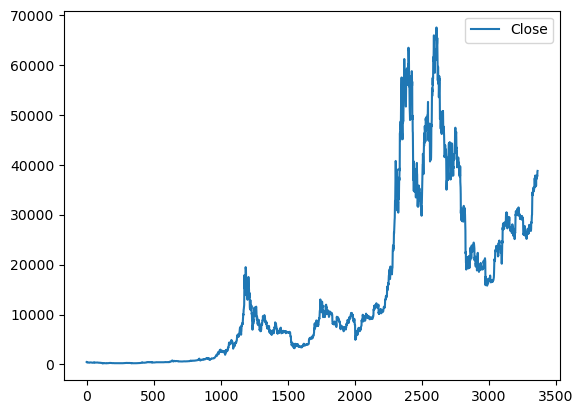

In [43]:
df.plot()

<Axes: >

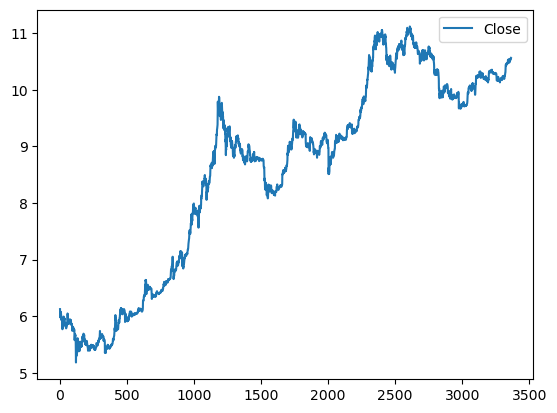

In [44]:
import numpy as np

df = np.log(df)
df.plot()

In [45]:
msk = (df.index < round(len(df) * 0.8))
df_train = df[msk].copy()
df_train = df[~msk].copy()

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

ImportError: DLL load failed while importing lapack_lite: Impossibile trovare il modulo specificato.

In [5]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-01-01', 
                                '2022-12-31', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-01-01,46444.710938,47178.125000,46306.445313,47686.812500
1,2022-01-02,47178.125000,46306.445313,47686.812500,47345.218750
2,2022-01-03,46306.445313,47686.812500,47345.218750,46458.117188
3,2022-01-04,47686.812500,47345.218750,46458.117188,45897.574219
4,2022-01-05,47345.218750,46458.117188,45897.574219,43569.003906
...,...,...,...,...,...
360,2022-12-27,16847.755859,16841.986328,16919.804688,16717.173828
361,2022-12-28,16841.986328,16919.804688,16717.173828,16552.572266
362,2022-12-29,16919.804688,16717.173828,16552.572266,16642.341797
363,2022-12-30,16717.173828,16552.572266,16642.341797,16602.585938


In [6]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((365,), (365, 3, 1), (365,))

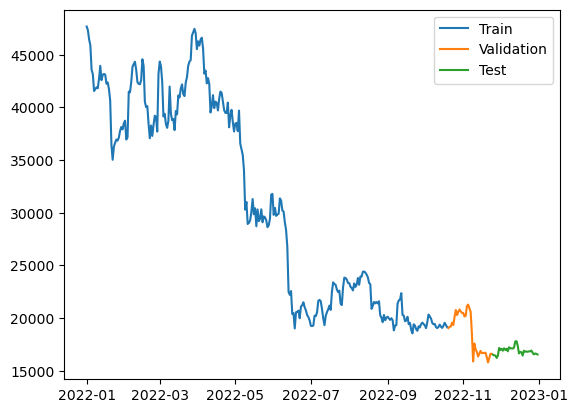

In [7]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
10/10 [==============================] - 3s 56ms/step - loss: 1044386624.0000 - mean_absolute_error: 30817.0078 - val_loss: 348675808.0000 - val_mean_absolute_error: 18577.3457
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1044360384.0000 - mean_absolute_error: 30816.5781 - val_loss: 348660608.0000 - val_mean_absolute_error: 18576.9355
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1044333312.0000 - mean_absolute_error: 30816.1445 - val_loss: 348641632.0000 - val_mean_absolute_error: 18576.4277
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1044295936.0000 - mean_absolute_error: 30815.5410 - val_loss: 348613568.0000 - val_mean_absolute_error: 18575.6699
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 1044242560.0000 - mean_absolute_error: 30814.6719 - val_loss: 348574752.0000 - val_mean_absolute_error: 18574.6270
Epoch 6/100
10/10 [==============================] - 0s 8ms

10/10 [==============================] - 0s 2ms/step


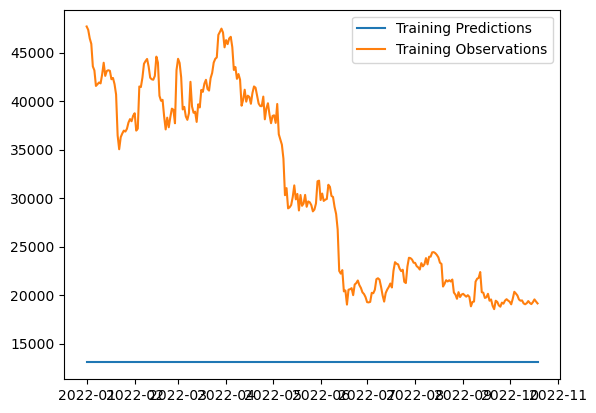

In [10]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])